In [1]:
import numpy as np 
import DataModule as dm 

In [4]:
database = dm.DataBase()

test = database.full_data() 

for t in test.keys():
    print(t, test[t])

symbol BTCUSD
priceChange -1648.10000000
priceChangePercent -6.168
weightedAvgPrice 25954.30304760
prevClosePrice 26721.31000000
lastPrice 25073.21000000
lastQty 0.02102000
bidPrice 0.00000000
bidQty 0.00000000
askPrice 0.00000000
askQty 0.00000000
openPrice 26721.31000000
highPrice 27400.00000000
lowPrice 24900.00000000
volume 163.68291000
quoteVolume 4248275.84985350
openTime 1689217555961
closeTime 1689303955961
firstId 88531163
lastId 88559777
count 28615


In [5]:
watcher = dm.Watcher()
print(watcher.price())

25073.21


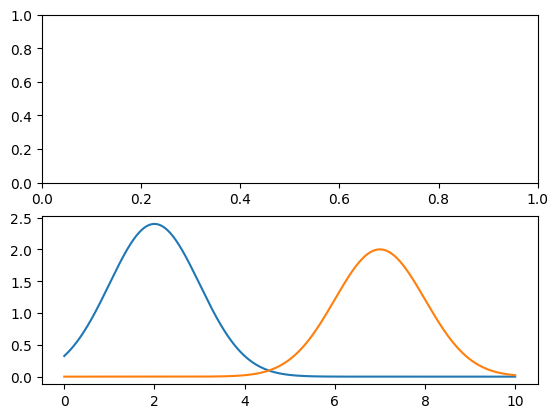

In [3]:
#test moving market distribution model
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2) 

x = np.linspace(0, 10, 3000) 

u1 = 2
u2 = 7

S = 2
B = 2.4 

v = .12

sig = .95

buyers = np.exp(-(x-u1)**2/2) * B
sellers = np.exp(-(x-u2)**2/2) * S


plt.plot(x, buyers)
plt.plot(x, sellers) 
plt.show()

In [4]:
def speculation():
    return np.sum(buyers*x) - np.sum(sellers*x) 

beta = .1
alpha = .1
def update_buyers_sellers(spec):
    new_b = buyers[:]
    new_s = sellers[:]

    new_b = np.maximum(np.zeros(len(x)), buyers - sellers) 
    new_s = np.maximum(np.zeros(len(x)), sellers - buyers)

    new_bb = np.zeros(len(x)) 
    new_ss = np.zeros(len(x))
    #return new_bb, new_ss
    for i in range(len(new_b)-1):
        new_bb[i+1] += sig*new_b[i]
        new_ss[i+1] += (1-sig)*new_s[i]

    for i in range(1, len(new_bb)):
        new_bb[i-1] += (1-sig)*new_b[i] 
        new_ss[i-1] += sig*new_s[i]
    #speculation shift 
    # buyer_shift = int(beta*spec)
    # seller_shift = int(alpha*spec) 

    # new_bb = new_b[:]
    # new_ss = new_s[:] 

    # new_bb[buyer_shift:] = new_bb[0:-buyer_shift] 
    # if buyer_shift > 0:
    #     new_bb[-1] += np.sum(new_b[-buyer_shift:])
    # elif buyer_shift < 0:
    #     new_bb[0] += np.sum(new_b[0:buyer_shift]) 
    # else:
    #     new_bb = new_b 

    # new_ss[seller_shift:] = new_ss[0:-seller_shift] 
    # if seller_shift > 0:
    #     new_ss[-1] += np.sum(new_s[-seller_shift:])
    # elif seller_shift < 0:
    #     new_ss[0] += np.sum(new_s[0:seller_shift]) 
    # else:
    #     new_ss = new_s 

    # return new_bb, new_ss 

    return new_bb, new_ss

In [13]:

population = [np.sum(buyers)+np.sum(sellers)]

plt.ion()
plt.clf()
graph1 = ax1.plot(x, buyers, color='blue')[0]
graph2 = ax1.plot(x, sellers, color='green')[0] 
#graph3 = ax2.plot(population)[0] 

buy_ydata = []
sell_ydata = []
for i in range(300):
    spec = speculation() 
    buyers, sellers = update_buyers_sellers(spec)
    buy_ydata.append(buyers)
    sell_ydata.append(sellers)     

#plt.pause(.01)
def animate(i):
    # spec = speculation() 
    # buyers, sellers = update_buyers_sellers(spec)
    # population += [np.sum(buyers)+np.sum(sellers)]
    # ax1.clear()
    # ax2.clear()
    # ax1.plot(x, buyers, color='blue')
    # ax1.plot(x, sellers, color='red') 
    # ax2.plot(population) 
    graph1.set_ydata(buy_ydata[i])
    #graph1.set_xdata(x)
    graph2.set_ydata(sell_ydata[i])
    #graph3.set_ydata(population)
   # plt.draw()
    return graph1#, graph2, graph3
   # plt.pause(.01)
ani = animation.FuncAnimation(fig, animate, interval=10, frames = 300)
ani.save('eco_evo.gif', fps=30)

MovieWriter ffmpeg unavailable; using Pillow instead.


<Figure size 640x480 with 0 Axes>

In [48]:
left = np.array([1,2,5,10])
right = np.array([]) 

sums = []
sequences = []

def choose(l, r, side, sum, seq):
    #print(l, r, side) 
    if len(r)>=4:
        sums.append(sum)
        sequences.append(seq)  
        return 
    if side=='left':
        for i in range(len(l)):
            if len(l)>1:
                for j in range(i+1, len(l)):
                    #print('got here') 
                    r1 = np.append(r, [l[i], l[j]]) 
                    sum1 = sum + max(l[i], l[j]) 
                    seq1 = seq + [(l[i], l[j])]
                    l1 = np.delete(l, [i, j])
                    choose(l1, r1, 'right', sum1, seq1)
            else:
                r1 = np.append(r, [l[0]])
                sum1 = sum + l[0] 
                seq1 = seq + [l[0]] 
                l1 = np.delete(l, [0]) 
                choose(l1, r1, 'right', sum1, seq1) 
    if side=='right':
        if len(r)==0:
            return 
        for i in range(len(r)):
           # print('got here: ', r) 
            l1 = np.append(l, [r[i]]) 
            sum1 = sum + r[i] 
            seq1 = seq + [r[i]]
            r1 = np.delete(r, [i]) 
            choose(l1, r1, 'left', sum1, seq1) 
                     

In [49]:
choose(left, right, 'left', 0, []) 

In [52]:
print(min(sums), np.argmin(sums), sequences[np.argmin(sums)])


17.0 0 [(1, 2), 1.0, (5.0, 10.0), 2.0, (1.0, 2.0)]


In [36]:
import requests 

url = 'http://finance.yahoo.com/chart/AAPL?showOptin=1#eyJpbnRlcnZhbCI6MSwicGVyaW9kaWNpdHkiOjEsInRpbWVVbml0IjoibWludXRlIiwiY2FuZGxlV2lkdGgiOjEuNzI1NjQxMDI1NjQxMDI1NywiZmxpcHBlZCI6ZmFsc2UsInZvbHVtZVVuZGVybGF5Ijp0cnVlLCJhZGoiOnRydWUsImNyb3NzaGFpciI6dHJ1ZSwiY2hhcnRUeXBlIjoibGluZSIsImV4dGVuZGVkIjpmYWxzZSwibWFya2V0U2Vzc2lvbnMiOnt9LCJhZ2dyZWdhdGlvblR5cGUiOiJvaGxjIiwiY2hhcnRTY2FsZSI6ImxpbmVhciIsInBhbmVscyI6eyJjaGFydCI6eyJwZXJjZW50IjoxLCJkaXNwbGF5IjoiQUFQTCIsImNoYXJ0TmFtZSI6ImNoYXJ0IiwiaW5kZXgiOjAsInlBeGlzIjp7Im5hbWUiOiJjaGFydCIsInBvc2l0aW9uIjpudWxsfSwieWF4aXNMSFMiOltdLCJ5YXhpc1JIUyI6WyJjaGFydCIsIuKAjHZvbCB1bmRy4oCMIl19fSwic2V0U3BhbiI6eyJtdWx0aXBsaWVyIjoxLCJiYXNlIjoidG9kYXkiLCJwZXJpb2RpY2l0eSI6eyJpbnRlcnZhbCI6MSwicGVyaW9kIjoxLCJ0aW1lVW5pdCI6Im1pbnV0ZSJ9fSwibGluZVdpZHRoIjoyLCJzdHJpcGVkQmFja2dyb3VuZCI6dHJ1ZSwiZXZlbnRzIjp0cnVlLCJjb2xvciI6IiMwMDgxZjIiLCJzdHJpcGVkQmFja2dyb3VkIjp0cnVlLCJldmVudE1hcCI6eyJjb3Jwb3JhdGUiOltdLCJzaWdEZXYiOnt9fSwiY3VzdG9tUmFuZ2UiOm51bGwsInN5bWJvbHMiOlt7InN5bWJvbCI6IkFBUEwiLCJzeW1ib2xPYmplY3QiOnsic3ltYm9sIjoiQUFQTCIsInF1b3RlVHlwZSI6IkVRVUlUWSIsImV4Y2hhbmdlVGltZVpvbmUiOiJBbWVyaWNhL05ld19Zb3JrIn0sInBlcmlvZGljaXR5IjoxLCJpbnRlcnZhbCI6MSwidGltZVVuaXQiOiJtaW51dGUiLCJzZXRTcGFuIjp7Im11bHRpcGxpZXIiOjEsImJhc2UiOiJ0b2RheSIsInBlcmlvZGljaXR5Ijp7ImludGVydmFsIjoxLCJwZXJpb2QiOjEsInRpbWVVbml0IjoibWludXRlIn19fV0sInN0dWRpZXMiOnsi4oCMdm9sIHVuZHLigIwiOnsidHlwZSI6InZvbCB1bmRyIiwiaW5wdXRzIjp7ImlkIjoi4oCMdm9sIHVuZHLigIwiLCJkaXNwbGF5Ijoi4oCMdm9sIHVuZHLigIwifSwib3V0cHV0cyI6eyJVcCBWb2x1bWUiOiIjMDBiMDYxIiwiRG93biBWb2x1bWUiOiIjZmYzMzNhIn0sInBhbmVsIjoiY2hhcnQiLCJwYXJhbWV0ZXJzIjp7IndpZHRoRmFjdG9yIjowLjQ1LCJjaGFydE5hbWUiOiJjaGFydCIsInBhbmVsTmFtZSI6ImNoYXJ0In19fX0-'
url2 = 'https://finance.yahoo.com/chart/AAPL?showOptin=1#eyJpbnRlcnZhbCI6MSwicGVyaW9kaWNpdHkiOjEsInRpbWVVbml0IjoibWludXRlIiwiY2FuZGxlV2lkdGgiOjEuNzI1NjQxMDI1NjQxMDI1NywiZmxpcHBlZCI6ZmFsc2UsInZvbHVtZVVuZGVybGF5Ijp0cnVlLCJhZGoiOnRydWUsImNyb3NzaGFpciI6dHJ1ZSwiY2hhcnRUeXBlIjoibGluZSIsImV4dGVuZGVkIjpmYWxzZSwibWFya2V0U2Vzc2lvbnMiOnt9LCJhZ2dyZWdhdGlvblR5cGUiOiJvaGxjIiwiY2hhcnRTY2FsZSI6ImxpbmVhciIsInBhbmVscyI6eyJjaGFydCI6eyJwZXJjZW50IjoxLCJkaXNwbGF5IjoiQUFQTCIsImNoYXJ0TmFtZSI6ImNoYXJ0IiwiaW5kZXgiOjAsInlBeGlzIjp7Im5hbWUiOiJjaGFydCIsInBvc2l0aW9uIjpudWxsfSwieWF4aXNMSFMiOltdLCJ5YXhpc1JIUyI6WyJjaGFydCIsIuKAjHZvbCB1bmRy4oCMIl19fSwic2V0U3BhbiI6eyJtdWx0aXBsaWVyIjoxLCJiYXNlIjoidG9kYXkiLCJwZXJpb2RpY2l0eSI6eyJpbnRlcnZhbCI6MSwicGVyaW9kIjoxLCJ0aW1lVW5pdCI6Im1pbnV0ZSJ9fSwibGluZVdpZHRoIjoyLCJzdHJpcGVkQmFja2dyb3VuZCI6dHJ1ZSwiZXZlbnRzIjp0cnVlLCJjb2xvciI6IiMwMDgxZjIiLCJzdHJpcGVkQmFja2dyb3VkIjp0cnVlLCJldmVudE1hcCI6eyJjb3Jwb3JhdGUiOltdLCJzaWdEZXYiOnt9fSwiY3VzdG9tUmFuZ2UiOm51bGwsInN5bWJvbHMiOlt7InN5bWJvbCI6IkFBUEwiLCJzeW1ib2xPYmplY3QiOnsic3ltYm9sIjoiQUFQTCIsInF1b3RlVHlwZSI6IkVRVUlUWSIsImV4Y2hhbmdlVGltZVpvbmUiOiJBbWVyaWNhL05ld19Zb3JrIn0sInBlcmlvZGljaXR5IjoxLCJpbnRlcnZhbCI6MSwidGltZVVuaXQiOiJtaW51dGUiLCJzZXRTcGFuIjp7Im11bHRpcGxpZXIiOjEsImJhc2UiOiJ0b2RheSIsInBlcmlvZGljaXR5Ijp7ImludGVydmFsIjoxLCJwZXJpb2QiOjEsInRpbWVVbml0IjoibWludXRlIn19fV0sInN0dWRpZXMiOnsi4oCMdm9sIHVuZHLigIwiOnsidHlwZSI6InZvbCB1bmRyIiwiaW5wdXRzIjp7ImlkIjoi4oCMdm9sIHVuZHLigIwiLCJkaXNwbGF5Ijoi4oCMdm9sIHVuZHLigIwifSwib3V0cHV0cyI6eyJVcCBWb2x1bWUiOiIjMDBiMDYxIiwiRG93biBWb2x1bWUiOiIjZmYzMzNhIn0sInBhbmVsIjoiY2hhcnQiLCJwYXJhbWV0ZXJzIjp7IndpZHRoRmFjdG9yIjowLjQ1LCJjaGFydE5hbWUiOiJjaGFydCIsInBhbmVsTmFtZSI6ImNoYXJ0In19fX0'
#url = 'https://finance.yahoo.com/quote/AAPL/'
req = requests.get(url2)

In [ ]:
print(req.text)

In [46]:
print(req.text.find('script src='))

5454


In [59]:
text = req.text 
starts = [i+12 for i in range(len(text)) if text.startswith('script src=', i)]
ends = [text.find('.js"', i)+3 for i in starts]

In [65]:
scripts_url = []
scripts = []
for i in range(len(starts)):
    scripts_url.append(text[starts[i]:ends[i]])
    scripts.append(requests.get(scripts_url[-1]).text)

In [92]:
keywords = ['stx-field-value']
#keywords = ['barney the rainbow dinosaurus']
import numpy as np

good = [(scripts_url[i], s) for i, s in enumerate(scripts) if np.array([k in s for k in keywords]).any()]

In [93]:
print(len(good), len(scripts))

29 30


In [88]:
print(good[0][0])

https://s.yimg.com/uc/finance/dd-site/js/common.89b951a0ccd8b41210df.modern.js
